In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_df=pd.read_csv(r"C:\Users\hdhiw\Downloads\Titanic Dataset.csv")

In [3]:
titanic_df

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,S,Second,man,True,0
887,female,19.0,0,0,30.0000,S,First,woman,True,1
888,female,NaN,1,2,23.4500,S,Third,woman,False,0
889,male,26.0,0,0,30.0000,C,First,man,True,1


In [4]:
cat=titanic_df.select_dtypes(include='object').columns
num=titanic_df.select_dtypes(exclude='object').columns

In [5]:
cat,num


(Index(['sex', 'embarked', 'class', 'who'], dtype='object'),
 Index(['age', 'sibsp', 'parch', 'fare', 'alone', 'survived'], dtype='object'))

In [6]:
titanic_df.isnull().sum()

sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
alone         0
survived      0
dtype: int64

In [7]:
mode=titanic_df['age'].median()
titanic_df['age'].fillna(mode,inplace=True)

C:\Users\hdhiw\AppData\Local\Temp\ipykernel_5540\430420781.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['age'].fillna(mode,inplace=True)


In [8]:
mode=titanic_df['embarked'].mode()[0]
titanic_df['embarked'].fillna(mode,inplace=True)

C:\Users\hdhiw\AppData\Local\Temp\ipykernel_5540\3036343740.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['embarked'].fillna(mode,inplace=True)


In [9]:
titanic_df.isnull().sum()

sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
class       0
who         0
alone       0
survived    0
dtype: int64

In [10]:
titanic_df.loc[:, ['class', 'who', 'alone']]

,class,who,alone
0,Third,man,False
1,First,woman,False
2,Third,woman,True
3,First,woman,False
4,Third,man,True
...,...,...,...
886,Second,man,True
887,First,woman,True
888,Third,woman,False
889,First,man,True


In [11]:
titanic_df.iloc[200:301,:2]

,sex,age
200,male,28.0
201,male,28.0
202,male,34.0
203,male,45.5
204,male,18.0
...,...,...
296,male,23.5
297,female,2.0
298,male,28.0
299,female,50.0


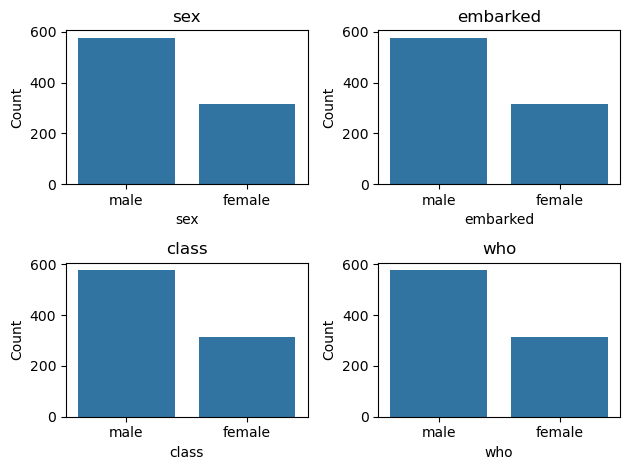

In [12]:
for i, column in enumerate(cat):
    key=titanic_df['sex'].value_counts().keys()
    plt.subplot(2,2,i+1)
    sns.countplot(data=titanic_df,x='sex',order=key)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Count')  
    plt.tight_layout()
plt.show()

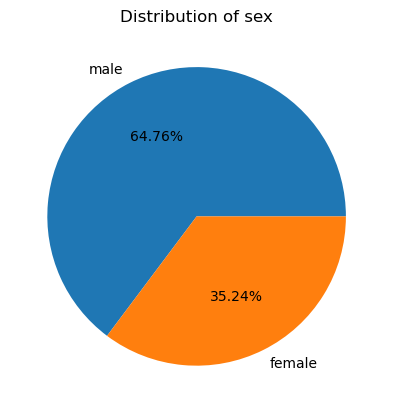

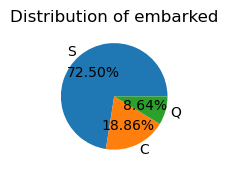

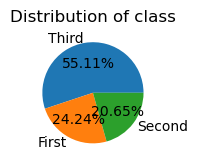

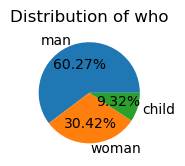

In [15]:
plt.figure(figsize=(15, 12))
for i, column in enumerate(cat):
    key =titanic_df[column].value_counts()
    plt.subplot(3, 2, i + 1)
    lables=key.index
    plt.pie(key, labels=lables, autopct="%0.2f%%")
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()